In [ ]:
# uptade de versão se necessário
#!pip install -U spacy

In [ ]:
#Documentos utilizados
# https://realpython.com/sentiment-analysis-python/
# https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
import numpy as np
import pandas as pd
import spacy

In [ ]:
df_imdb = pd.read_csv('./IMDB Dataset.csv')

In [ ]:
df_imdb.count()

review       50000
sentiment    50000
dtype: int64

In [ ]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


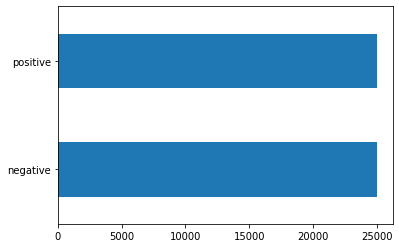

In [ ]:
df_imdb.sentiment.value_counts().plot(kind = 'barh')

In [ ]:
# Carrega o modelo spacy em ingles e portugues
# !python -m spacy download en_core_web_sm
# !python -m spacy download pt_core_news_sm

nlp = spacy.load("en_core_web_sm")

In [ ]:
# método para espaçar tags html
# https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
import re
def space_tags(text):
    # adiciona o espaço
    spaced_text = re.sub('([.,!?()])', r' \1 ', text)
    # remove os espaços extras
    return re.sub('\s{2,}', ' ', spaced_text)

In [ ]:
# Método para lidar com as tags HTML que podem aparecer 
# Ele foi tirado daqui: https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [ ]:
# stop_words em inglês
from spacy.lang.en.stop_words import STOP_WORDS

# função pra remover caracteres especiais e espaço
# A ideia é ver se dentro do lemma ainda tem palavras, senão descarta
# Números também não são interessantes num primeiro momento, então eles tmb serão desconsiderados
# https://datascience.stackexchange.com/questions/39960/remove-special-character-in-a-list-or-string
def clean_special_chars(text):
  return re.sub(r'[^a-zA-Z_]+', '', text)

vocab = [] 
total_words = 0    

for text in df_imdb['review']:
    
    # limpeza inicial do texto
    # colcoar em caixa baixa
    clean_text = text.lower()

    # remover tags depois de adicionar espaços entre elas, desta forma evitamos
    # certas questões quanto a remover tags, mas elas estarem grudadas no texto 
    # e colarem palavras
    clean_text = strip_tags(space_tags(clean_text))

    #analisa texto
    doc = nlp(clean_text)
    
    #exporta todos os tokens
    token_list = [token for token in doc]
    
    #exporta todos os tokens evitando stopwords e pontuações
    filtered_tokens = [token for token in doc if not token.is_stop and not token.is_punct]
    
    #pega o lemma dos tokens removendo qualquer outro indicio de caracter especial ou stopword
    lemmas = [ token.lemma_ for token in filtered_tokens if clean_special_chars(token.lemma_) and token.lemma_ not in STOP_WORDS]
    
    #conta total words
    total_words = total_words + len(lemmas)
    
    for i in range(len(lemmas)):
        if lemmas[i] not in vocab: # to check if word is already in vocab
            vocab.append(lemmas[i])

In [ ]:
# eram    7010495
# e ficou 5062194
total_words

7010495

In [ ]:
vocab

['reviewer',
 'mention',
 'watch',
 '1',
 'Oz',
 'episode',
 'hook',
 '.',
 'right',
 ',',
 'exactly',
 'happen',
 'me.<br',
 '/><br',
 '/>the',
 'thing',
 'strike',
 'brutality',
 'unflinche',
 'scene',
 'violence',
 'set',
 'word',
 'trust',
 'faint',
 'hearted',
 'timid',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'hardcore',
 'classic',
 'use',
 'word.<br',
 '/>it',
 'call',
 'oz',
 'nickname',
 'give',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'focus',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privacy',
 'high',
 'agenda',
 'Em',
 'home',
 '..',
 'Aryans',
 'Muslims',
 'gangsta',
 'Latinos',
 'Christians',
 'Italians',
 'irish',
 '....',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'far',
 'away.<br',
 '/>i',
 'main',
 'appeal',
 'fact',
 'go',
 'show',
 'dare',
 'forget',
 'pretty',
 'picture',
 'paint',
 'mainstream',
 'audience',
 'charm',

In [ ]:
# salvar o vocab como csv
vocab_df = pd.DataFrame(vocab)  
vocab_df.head()

,0
0,reviewer
1,mention
2,watch
3,1
4,Oz


In [ ]:
# salvar o vocab como csv
vocab_df.to_csv('vocab.csv')  

In [ ]:
#AQUI O CODIGO ESTA REPETIDO, A PARTE CENTRAL
#DA PRA REFATORAR

bow_vec = []      # list to store bag of words vectors

for i in range(len(df_imdb['review'])):
   
    #cria novo vetor
    doc_vec = []
    
    #analisa texto
    doc = nlp(text)
    
    #exporta todos os tokens
    token_list = [token for token in doc]
    
    #exporta todos os tokens evitando stopwords
    filtered_tokens = [token for token in doc if not token.is_stop]
    
    #pega o lemma dos tokens
    lemmas = [ token.lemma_ for token in filtered_tokens ]
    
    #conta total words
    total_words = total_words + len(lemmas)
    
    for j in range(len(vocab)): # iterate over vocab 
        if vocab[j] in lemmas: 
            doc_vec.append(doc.count(vocab[j])) # append freq if present
        else:
            doc_vec.append(0) # else append zero
            
    bow_vec.append(doc_vec)
    

AttributeError: ignored

In [ ]:
df_bag = pd.DataFrame(bow_vec, columns = vocab)
df_bag.head()

In [ ]:
!python -m spacy info

2021-03-13 00:45:07.308121: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

============================== Info about spaCy ==============================

spaCy version    3.0.5                         
Location         /usr/local/lib/python3.7/dist-packages/spacy
Platform         Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version   3.7.10                        
Pipelines        pt_core_news_sm (3.0.0), en_core_web_sm (3.0.0)

